Predict Emotion From EEG Data

    My project tries to use quantitative EEG data to predict emotion. The availability of data in the form needed for this analysis was scarce. However, I was able to find very well collected data by Jordan Bird a PhD researcher from Aston University in the UK.

https://www.researchgate.net/publication/329403546_Mental_Emotional_Sentiment_Classification_with_an_EEG-based_Brain-machine_Interface (related research)

    The dataset is of EEG brainwave data that has been processed in a way to be expressed qualitatively. (qEEG or quantitative EEG is above the scope of my understanding, an explanation of what it is can be found at this link https://qeegsupport.com/what-is-qeeg-or-brain-mapping/#:~:text=Quantitative%20EEG%20(qEEG)%20is%20the,the%20EEG%20and%20brain%20function.) The data was collected from two people (1 male and 1 female) for 3 minutes at three different states which were defined as negative, positive and neutral). The negative and positive states were induced by using video images from movies and other sources.
    
   I took this data and processed it to change the labels from negative, neutral and positive to -1,0,1. After doing so did a train test spil of 70% to 30% and trained it on a SVC, decision tree classifier, K nearest neighbor, Random Forest, and Multiple Layer Perceptronto see which model would work best. On all models checked the accuracy using 10-fold cross validation and checking the accuracy on the test split. The results are submitted below in a table. I also tried majority voting from SVC, decision tree, KNN and Random forest ensemble, From the different type of classifiers Random Forest, did the best on both test split accuracy and 10 fold cross validation accuracy. 
    The results look very promising, from the table below, it can be shown that it is possible to train a machine model to look and analyze brain data to get meaningful information. This has implication that over time we can get to a better level of understanding of the brain. This can be used in analyzing emotional conditions and maybe even tell if people are telling the truth. Also the ability to analyze EEG data can lead to communication directly from the brain that can be understood, which can help people that are paralyzed or in general being able to check the health of the brain. 
    Eventhough I was unable to get more qualitative EEG data from other sources, additional work can be done on this project running the model on data collected from other sources. 

In [2]:
import csv
import numpy as np
import pandas as pd


# import data file

emotion = pd.read_csv('emotions.csv')

# Print data set

emotion


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


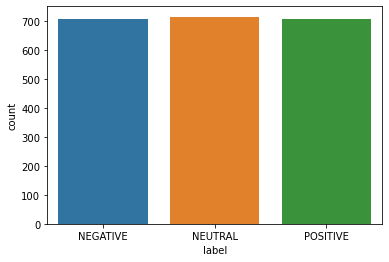

In [29]:
import seaborn as sns
sns.countplot(x='label', data=emotion)

In [3]:
# change the label of the class from Negative, Neutral and Positive to -1,0 and 1 respectively
change = ({'NEUTRAL': -1, 'POSITIVE': 0, 'NEGATIVE': 1} )

emotion1 = emotion.replace(change)

emotion1


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,1
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,-1
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,0
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,0
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,-1
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,0
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,1
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,1


In [4]:
from sklearn.model_selection import train_test_split

#change data to numpy array
a = emotion1.to_numpy()

X = a[:,:2548]
y = a[:,2548]
# split data training data and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)




In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

pipe1 = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0))

pipe2 = make_pipeline(DecisionTreeClassifier(max_depth=6,
                                             criterion='entropy',
                                             random_state=0))

pipe3 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=20,
                                                             p=3,
                                                             metric='minkowski'))
pipe4 = make_pipeline(RandomForestClassifier(n_estimators=100, random_state = 0))


clf_labels = ['SVC', 'Decision tree', 'KNN', 'Random Forest']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3, pipe4], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")                                                             

10-fold cross validation:

Accuracy: 0.34 Stdev: 0.003 [SVC]
Accuracy: 0.96 Stdev: 0.017 [Decision tree]
Accuracy: 0.89 Stdev: 0.028 [KNN]
Accuracy: 0.98 Stdev: 0.013 [Random Forest]


In [12]:
from sklearn.ensemble import VotingClassifier

mv_clf = VotingClassifier(estimators=[('svc', pipe1), ('dt', pipe2), ('kn', pipe3), ('rf', pipe4)])

clf_labels += ['Majority voting']
all_clf = [pipe1, pipe2, pipe3, pipe4, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: " + str(round(scores.mean(), 2)) + 
          " Stdev: " + str(round(scores.std(), 3)) +
          " [" + label + "]")

Accuracy: 0.34 Stdev: 0.003 [SVC]
Accuracy: 0.96 Stdev: 0.017 [Decision tree]
Accuracy: 0.89 Stdev: 0.028 [KNN]
Accuracy: 0.98 Stdev: 0.013 [Random Forest]
Accuracy: 0.94 Stdev: 0.02 [Majority voting]


In [13]:
pipe1.fit(X_train, y_train)

y_pred = pipe1.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe1.score(X_test, y_test))



Misclassified test set examples: 430
Out of a total of: 640
Accuracy: 0.328125


In [14]:
pipe2.fit(X_train, y_train)

y_pred = pipe2.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe2.score(X_test, y_test))

Misclassified test set examples: 10
Out of a total of: 640
Accuracy: 0.984375


In [30]:
pipe3.fit(X_train, y_train)

y_pred = pipe3.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe3.score(X_test, y_test))

Misclassified test set examples: 59
Out of a total of: 640
Accuracy: 0.9078125


In [31]:
pipe4.fit(X_train, y_train)

y_pred = pipe4.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', pipe4.score(X_test, y_test))

Misclassified test set examples: 7
Out of a total of: 640
Accuracy: 0.9890625


In [32]:
mv_clf.fit(X_train, y_train)

y_pred = mv_clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', mv_clf.score(X_test, y_test))

Misclassified test set examples: 31
Out of a total of: 640
Accuracy: 0.9515625


In [26]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(64,64,64),activation="logistic" ,random_state=1, max_iter=2000)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Misclassified test set examples:', (y_test != y_pred).sum())
print('Out of a total of:', y_test.shape[0])
print('Accuracy:', clf.score(X_test, y_test))

print('10-fold cross validation:\n')
scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
print("Accuracy: " + str(round(scores.mean(), 2)) + 
         " Stdev: " + str(round(scores.std(), 3)) +
          " ['Multi Layer Precepteron']")
    

Misclassified test set examples: 204
Out of a total of: 640
Accuracy: 0.68125
10-fold cross validation:

Accuracy: 0.66 Stdev: 0.02 ['Multi Layer Precepteron']


| Model | Accuracy from test split | 10-fold cross validation accuracy|
|-------|--------------------------|----------------------------------|
|  SVC  | 0.33 | 0.34 |
|Decision Tree| 0.98 | 0.96 |
|  KNN  | 0.91 | 0.89 |
| Random Forest | 0.99 | 0.98 |
| Majority Voting (above 4) | 0.95 | 0.94 |
| Multi Neuron Percepteron | 0.68 | 0.66 |